Load package, provide file locations, and create list of variables (`vars`) 

In [18]:
import JuliaCompare as J
import JuliaCompare: db_files, Canada
using DataFrames

CODE_FOLDER = raw"\\Pink\c\2020CanadaAsh\Engine"
DATA_FOLDER = raw"C:\2020CanadaAsh\2020Model\Ref23"
DATA_FOLDER2 = raw"C:\2020CanadaAsh\2020Model\Ref23A_170_A"

vars = J.list_vars(CODE_FOLDER, DATA_FOLDER, db_files);
loc1 = J.Loc(vars, DATA_FOLDER);
loc2 = J.Loc(vars, DATA_FOLDER2);

With that done, we can load any variable into Julia with a simple `var` call and compare the two versions of those variables with `diff`.

In [19]:
totpol_ref = J.var("TotPol", loc1);
totpol_ag = J.var("TotPol", loc2);

totpol_diff = J.diff(totpol_ref, totpol_ag; name1="ref", name2="ag");
first(totpol_diff, 5)


fname is: C:\2020CanadaAsh\2020Model\Ref23\SOutput.dba


fname is: C:\2020CanadaAsh\2020Model\Ref23A_170_A\SOutput.dba

Row,ECC,Poll,Area,Year,ref,ag,Diff
,String,String,String,Int64,Float64?,Float64?,Float64
1,Single Family,Sulphur Oxides,Ontario,1986,5635.62,5635.62,0.0
2,Multi Family,Sulphur Oxides,Ontario,1986,2024.62,2024.62,0.0
3,Other Residential,Sulphur Oxides,Ontario,1986,64.8696,64.8696,0.0
4,Wholesale Trade,Sulphur Oxides,Ontario,1986,408.328,408.328,0.0
5,Retail Trade,Sulphur Oxides,Ontario,1986,926.891,926.891,0.0


Now that we have the dataframe with the differences we can determine where the differences are. Let's look at how they overall using `hist_diff`.

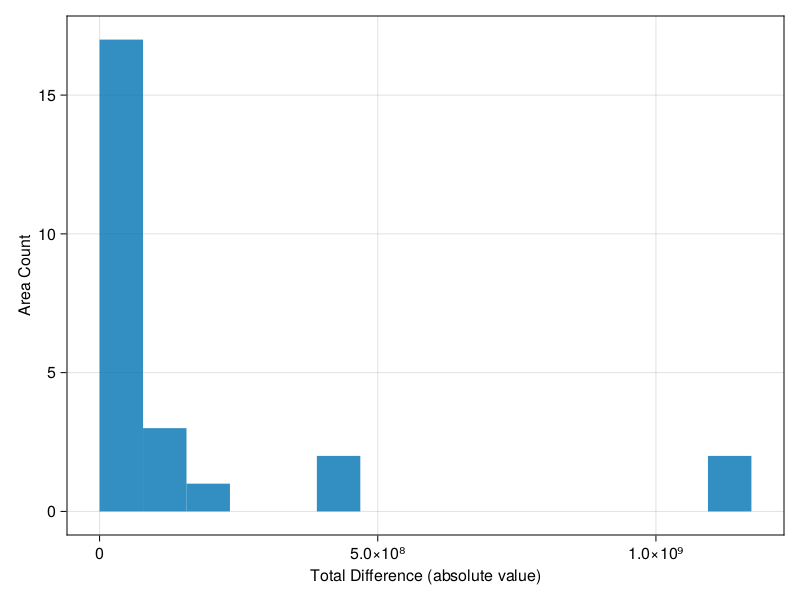

CairoMakie.Screen{IMAGE}


In [20]:
J.hist_diff(totpol_diff; dim="Area")

There differences across quite a few areas. How about ECCs?

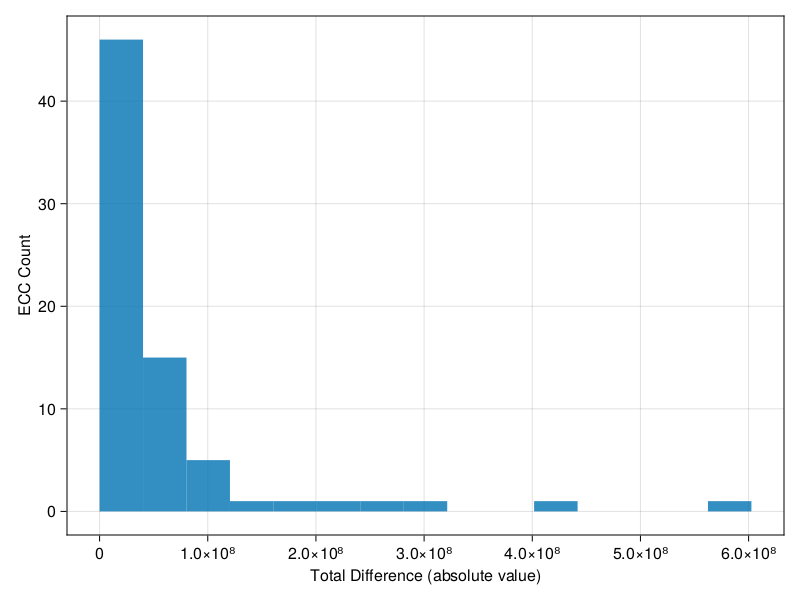

CairoMakie.Screen{IMAGE}


In [21]:
J.hist_diff(totpol_diff;dim="ECC")

There's one ECC that's causing all the issues. Let's see how it looks over years.

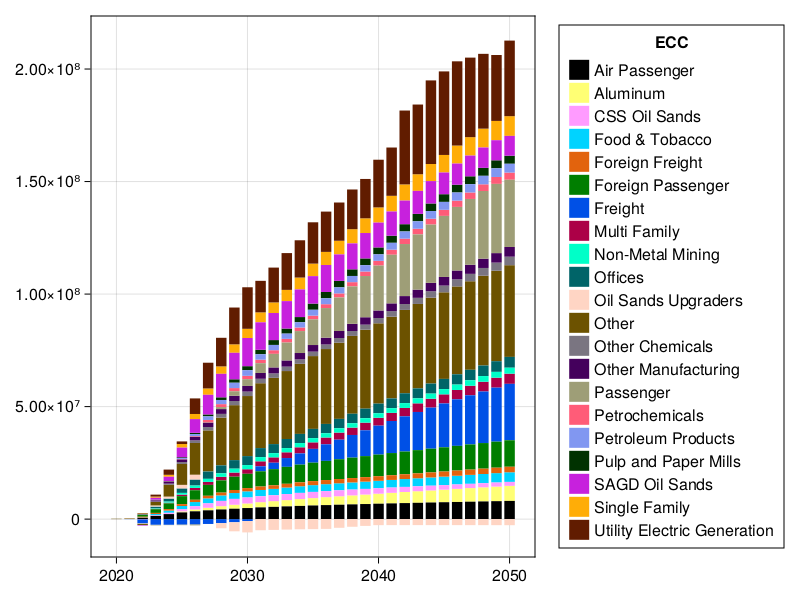

CairoMakie.Screen{IMAGE}


In [25]:
subset!(totpol_diff, :Year => x -> x .>= 2020)
J.plot_diff(totpol_diff; dim = "ECC", num = 20)

In [23]:
totpol_diff

Row,ECC,Poll,Area,Year,ref,ag,Diff
,String,String,String,Int64,Float64?,Float64?,Float64
1,Single Family,Sulphur Oxides,Ontario,2020,260.195,260.195,0.0
2,Multi Family,Sulphur Oxides,Ontario,2020,109.929,109.929,0.0
3,Other Residential,Sulphur Oxides,Ontario,2020,1.73586,1.73586,0.0
4,Offices,Sulphur Oxides,Ontario,2020,409.921,409.921,0.0
5,Natural Gas Distribution,Sulphur Oxides,Ontario,2020,0.0300165,0.0300165,0.0
6,Natural Gas Pipelines,Sulphur Oxides,Ontario,2020,0.830403,0.830403,0.0
7,Food & Tobacco,Sulphur Oxides,Ontario,2020,119.519,119.519,0.0
8,"Textiles, Apparel & Leather",Sulphur Oxides,Ontario,2020,0.00411014,0.00411014,0.0
9,Lumber,Sulphur Oxides,Ontario,2020,32.0027,32.0027,0.0
